<a href="https://colab.research.google.com/github/yashwanth6/Glaucoma-Detection/blob/main/glaucoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title DATA PREPROCESSING_1
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage import exposure
from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.io import imread, imshow
import skimage
import math
import cv2
from by import disk
from google.colab.patches import cv2_imshow
from skimage import exposure
from math import ceil
import os
import matplotlib.image as mpimg
 
def prob(temp):
  lst = [0] * 256
  for i in range(len(temp)):
    for j in range(len(temp[0])):
      x = ceil(temp[i,j]*255)
      lst[x] += 1
  tot = sum(lst)
  for i in range(256):
    lst[i] = float(lst[i]) / tot
  cnt = 0
  for i in range(len(temp)):
    for j in range(len(temp[0])):
      pro = lst[ceil(temp[i, j]*255)]
      if pro != 0:
        lst[ceil(temp[i, j]*255)] = 0
        cnt += np.log2(pro) * -1 * pro
  return cnt
  
 
def distance(x1 , y1 , x2 , y2): 
    return math.sqrt(math.pow(x2 - x1, 2) +
                math.pow(y2 - y1, 2) * 1.0) 
 
path = "/content/drive/My Drive/unit"
#pathout="/content/drive/My Drive/GT"
for filename in os.listdir(path):
  number = ""
  for i in range(len(filename)):
      if filename[i].isnumeric():
        number += filename[i]
  print(filename)
  # cup_seg = imread(os.path.join(pathout+"/drishtiGS_"+number+"/SoftMap/", "drishtiGS_"+number+"_cupsegSoftmap.png"))
  # OD_seg = imread(os.path.join(pathout+"/drishtiGS_"+number+"/SoftMap/", "drishtiGS_"+number+"_ODsegSoftmap.png"))
  img = imread(os.path.join(path, filename))
  image = imread(os.path.join(path, filename))
  image = image[:, :, 0]
  edges = canny(image, sigma=3, low_threshold=10, high_threshold=16)
  mini = 10000000
  fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))
  hough_radii = np.arange(180, 251, 1)
  hough_res = hough_circle(edges, hough_radii)
  centers = []
  accums = []
  radii = []
  tot = [len(image)//2, len(image[0])//2]
  for radius, h in zip(hough_radii, hough_res):
      num_peaks = 1
      peaks = peak_local_max(h, num_peaks=num_peaks)
      if mini >= distance(tot[0], tot[1], peaks[0][0], peaks[0][1]): 
        centers = peaks
        accums = h[peaks[:, 0], peaks[:, 1]]
        radii = [radius]
        mini = distance(tot[0], tot[1], peaks[0][0], peaks[0][1])
  x, y = 0, 0
  for idx in np.argsort(accums)[::-1][:]:
      center_x, center_y = centers[idx]
      x, y = center_x, center_y
      radius = radii[idx]
      cx, cy = circle_perimeter(center_x, center_y, radius)
      #image[cx, cy] = [220, 20, 20]
      
  image = image[x-300:x+300, y-300:y+300]
  img = img[x-300:x+300, y-300:y+300,:]
  #skimage.io.imsave("image.png", img)
 
  img = color.rgb2lab(img) 
  for i in range(3):
    img[:, :, i] = np.subtract(img[:,: ,i ], np.mean(img[:, :, i]))
    img[:, :, i] = np.add(img[:, :, i], abs(np.amin(img[:, :, i])))
    img[:, :, i] = np.divide(img[:, :, i], np.nanstd(img[:, :, i]))
    img[:, :, i] = np.divide(img[:, :, i], np.amax(img[:, :, i]))
  print(np.amax(img))
  ori = img.copy()
  entr_img = img.copy()
 
  entropy_square = [] 
  for k in range(3):
    for i in range(0, len(img)):
      for j in range(0, len(img[0])):
        temp = img[max(i-3, 0):min(i+4, len(img)-1),max(j-3,0):min(j+4, len(img[0]-1)),k]
        # entr_img[i,j,k] = skimage.measure.shannon_entropy(temp, 2)
        entr_img[i, j, k] = prob(temp)
  # Nei = np.array([[1]*7 for _ in range(7)])
  # for k in range(3):
  #   entr_img[:, :, k] = entropy(img[:, :, k], Nei)
  img = entr_img.copy()
  for i in range(len(img)):
    for j in range(len(img[0])):
        cnt = np.square(np.sum(entr_img[i, j, :]))
        img[i, j, 0] = cnt
        img[i, j, 1] = cnt
        img[i, j, 2] = cnt
  img = img[:, :, 0]
  # for i in range(3):
  #   img[:, :, i] = np.subtract(img[:,: ,i ], np.mean(img[:, :, i]))
  #   img[:, :, i] = np.add(img[:, :, i], abs(np.amin(img[:, :, i])))
  #   img[:, :, i] = np.divide(img[:, :, i], np.nanstd(img[:, :, i]))
  #   img[:, :, i] = np.divide(img[:, :, i], np.amax(img[:, :, i]))
  skimage.io.imsave(os.path.join("/content/drive/My Drive/pretest123", "drishtiGS_"+number+".png"), image)
  # skimage.io.imsave(os.path.join("/content/drive/My Drive/pre_out/"+"drishtiGS_"+number+"/SoftMap/"+"drishtiGS_"+number+"_cupsegSoftmap.png"), cup_seg[x-300:x+300, y-300:y+300])
  # skimage.io.imsave(os.path.join("/content/drive/My Drive/pre_out/"+"drishtiGS_"+number+"/SoftMap/"+"drishtiGS_"+number+"_ODsegSoftmap.png"), OD_seg[x-300:x+300, y-300:y+300])
 
# ax.imshow(img, cmap=plt.cm.gray)

In [ ]:
#@title DATA PREPROCESSING_2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage import exposure
from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.io import imread, imshow
import skimage
import math
import cv2
from skimage.morphology import disk
from google.colab.patches import cv2_imshow
from skimage import exposure
from math import ceil
import os
import matplotlib.image as mpimg
 
def prob(temp):
  lst = [0] * 256
  for i in range(len(temp)):
    for j in range(len(temp[0])):
      x = ceil(temp[i,j]*255)
      lst[x] += 1
  tot = sum(lst)
  for i in range(256):
    lst[i] = float(lst[i]) / tot
  cnt = 0
  for i in range(len(temp)):
    for j in range(len(temp[0])):
      pro = lst[ceil(temp[i, j]*255)]
      if pro != 0:
        lst[ceil(temp[i, j]*255)] = 0
        cnt += np.log2(pro) * -1 * pro
  return cnt
  
 
def distance(x1 , y1 , x2 , y2): 
    return math.sqrt(math.pow(x2 - x1, 2) +
                math.pow(y2 - y1, 2) * 1.0) 
 
path = "/content/drive/My Drive/Images1"
pathout="/content/drive/My Drive/Test_GT"
for filename in os.listdir(path):
  number = ""
  for i in range(len(filename)):
      if filename[i].isnumeric():
        number += filename[i]
  print(filename)
  cup_seg = imread(os.path.join(pathout+"/drishtiGS_"+number+"/SoftMap/", "drishtiGS_"+number+"_cupsegSoftmap.png"))
  OD_seg = imread(os.path.join(pathout+"/drishtiGS_"+number+"/SoftMap/", "drishtiGS_"+number+"_ODsegSoftmap.png"))
  img = imread(os.path.join(path, filename))
  image = imread(os.path.join(path, filename))
  image = image[:, :, 0]
  edges = canny(image, sigma=3, low_threshold=10, high_threshold=16)
  mini = 10000000
  fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 10))
  hough_radii = np.arange(180, 251, 1)
  hough_res = hough_circle(edges, hough_radii)
  centers = []
  accums = []
  radii = []
  tot = [len(image)//2, len(image[0])//2]
  for radius, h in zip(hough_radii, hough_res):
      num_peaks = 1
      peaks = peak_local_max(h, num_peaks=num_peaks)
      if mini >= distance(tot[0], tot[1], peaks[0][0], peaks[0][1]): 
        centers = peaks
        accums = h[peaks[:, 0], peaks[:, 1]]
        radii = [radius]
        mini = distance(tot[0], tot[1], peaks[0][0], peaks[0][1])
  x, y = 0, 0
  for idx in np.argsort(accums)[::-1][:]:
      center_x, center_y = centers[idx]
      x, y = center_x, center_y
      radius = radii[idx]
      cx, cy = circle_perimeter(center_x, center_y, radius)
      #image[cx, cy] = [220, 20, 20]
      
  image = image[x-300:x+300, y-300:y+300]
  img = img[x-300:x+300, y-300:y+300,:]
  #skimage.io.imsave("image.png", img)
 
  img = color.rgb2lab(img) 
  for i in range(3):
    img[:, :, i] = np.subtract(img[:,: ,i ], np.mean(img[:, :, i]))
    img[:, :, i] = np.add(img[:, :, i], abs(np.amin(img[:, :, i])))
    img[:, :, i] = np.divide(img[:, :, i], np.nanstd(img[:, :, i]))
    img[:, :, i] = np.divide(img[:, :, i], np.amax(img[:, :, i]))
  print(np.amax(img))
  ori = img.copy()
  entr_img = img.copy()
 
  entropy_square = [] 
  for k in range(3):
    for i in range(0, len(img)):
      for j in range(0, len(img[0])):
        temp = img[max(i-3, 0):min(i+4, len(img)-1),max(j-3,0):min(j+4, len(img[0]-1)),k]
        # entr_img[i,j,k] = skimage.measure.shannon_entropy(temp, 2)
        entr_img[i, j, k] = prob(temp)
  # Nei = np.array([[1]*7 for _ in range(7)])
  # for k in range(3):
  #   entr_img[:, :, k] = entropy(img[:, :, k], Nei)
  img = entr_img.copy()
  for i in range(len(img)):
    for j in range(len(img[0])):
        cnt = np.square(np.sum(entr_img[i, j, :]))
        img[i, j, 0] = cnt
        img[i, j, 1] = cnt
        img[i, j, 2] = cnt
  img = img[:, :, 0]
  # for i in range(3):
  #   img[:, :, i] = np.subtract(img[:,: ,i ], np.mean(img[:, :, i]))
  #   img[:, :, i] = np.add(img[:, :, i], abs(np.amin(img[:, :, i])))
  #   img[:, :, i] = np.divide(img[:, :, i], np.nanstd(img[:, :, i]))
  #   img[:, :, i] = np.divide(img[:, :, i], np.amax(img[:, :, i]))
  # skimage.io.imsave(os.path.join("/content/drive/My Drive/pre", "drishtiGS_"+number+".png"), image)
  skimage.io.imsave(os.path.join("/content/drive/My Drive/preTest_GT/"+"drishtiGS_"+number+"/SoftMap/"+"drishtiGS_"+number+"_cupsegSoftmap.png"), cup_seg[x-300:x+300, y-300:y+300])
  skimage.io.imsave(os.path.join("/content/drive/My Drive/preTest_GT/"+"drishtiGS_"+number+"/SoftMap/"+"drishtiGS_"+number+"_ODsegSoftmap.png"), OD_seg[x-300:x+300, y-300:y+300])
 
# ax.imshow(img, cmap=plt.cm.gray)

In [ ]:
#@title Augmentation Code
# load the image from disk
import numpy as np
#from keras.utils import np_utils
#from np_utils import to_categorical
import argparse
import imutils
import cv2
from math import ceil 
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage import exposure
from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.io import imread, imshow, imsave
import skimage
import math
from skimage.morphology import disk
from google.colab.patches import cv2_imshow
from skimage import exposure
from math import ceil
import os
import matplotlib.image as mpimg
import tensorlayer as tl
def enchance(img1):
  img1 = np.uint8(cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX))
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  img1 = clahe.apply(img1)
  return img1/255
path = "/content/drive/My Drive/dataset/Trainin"
pathout="/content/drive/My Drive/dataset/Train/"
for filename in os.listdir(path):
  number = ""
  for i in range(len(filename)):
      if filename[i].isnumeric():
        number += filename[i]
  print(filename)
  cup_seg = imread(os.path.join(pathout+"/drishtiGS_"+number+"/SoftMap/", "drishtiGS_"+number+"_cupsegSoftmap.png"))
  OD_seg = imread(os.path.join(pathout+"/drishtiGS_"+number+"/SoftMap/", "drishtiGS_"+number+"_ODsegSoftmap.png"))
  image = imread(os.path.join(path, filename))
  i = 0
  image = image[:, :,  np.newaxis]
  cup_seg = cup_seg[:, :,  np.newaxis]
  OD_seg = OD_seg[:, :, np.newaxis]
  for angle in np.arange(0, 360, 18):
    i += 1
    rotated_in, rotated_cupseg, rotated_disc = tl.prepro.rotation_multi([image, cup_seg, OD_seg], rg=angle,
                            is_random=False, fill_mode='constant', row_index=0, col_index=1, channel_index=2)
    rotated_in = cv2.resize(rotated_in, (256, 256))
    rotated_cupseg = cv2.resize(rotated_cupseg, (256, 256))
    rotated_disc = cv2.resize(rotated_disc, (256, 256))
    rotated_in = enchance(rotated_in)
    rotated_cupseg = np.where(rotated_cupseg>0, 1, 0)
    rotated_disc = np.where(rotated_disc>0, 1, 0)
    os.mkdir(os.path.join("/content/drive/My Drive/enhan/trainout", "drishtiGS_"+number+"_{}".format(i)))
    os.mkdir("/content/drive/My Drive/enhan/trainout/"+"drishtiGS_"+number+"_{}".format(i)+"/SoftMap/")
    imsave(os.path.join("/content/drive/My Drive/enhan/trainin/"+"drishtiGS_"+number+"_{}".format(i)+".png"), rotated_in)  
    imsave(os.path.join("/content/drive/My Drive/enhan/trainout/"+"drishtiGS_"+number+"_{}".format(i)+"/SoftMap/"+"drishtiGS_"+number+"_"+"{}".format(i)+"_cupsegSoftmap.png"), rotated_cupseg)
    imsave(os.path.join("/content/drive/My Drive/enhan/trainout/"+"drishtiGS_"+number+"_{}".format(i)+"/SoftMap/"+"drishtiGS_"+number+"_"+"{}".format(i)+"_ODsegSoftmap.png"), rotated_disc)

In [ ]:
#@title Taking Train Set Values
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage import exposure
from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.io import imread, imshow
import skimage
import math
import cv2
from skimage.morphology import disk
from google.colab.patches import cv2_imshow
from skimage import exposure
from math import ceil
import os
import matplotlib.image as mpimg

"""optimizer=Adam(lr=0.0001)
model1=unet(input_size=(600,600,1))
model1.compile(loss='binary_crossentropy
',optimizer=optimizer,metrics=['accuracy'])"""
path = "/content/drive/My Drive/enhan/trainin"
pathout="/content/drive/My Drive/enhan/trainout"
X_train = []
Y_train = []
Y_train1= []
i = 0
for filename in os.listdir(path):
  print(i)
  i = i+1
  name = filename[:-4]
  X = np.array(np.array(imread(os.path.join(path, filename))))
  X = np.divide(X, 255)
  X_train.append(X)
  Y = np.array(imread(os.path.join(pathout, name+"/SoftMap/"+name+"_ODsegSoftmap"+".png")))
  Y_train.append(Y)
  Z = np.array(imread(os.path.join(pathout, name+"/SoftMap/"+name+"_cupsegSoftmap"+".png")))
  Y_train1.append(Z)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
Y_train1 = np.array(Y_train1)

X_train=X_train[:,:,:,np.newaxis]
Y_train=Y_train[:,:,:,np.newaxis]
Y_train1=Y_train1[:,:,:,np.newaxis]

In [ ]:
#@title Taking Test Set Values
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage import exposure
from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.io import imread, imshow
import skimage
import math
import cv2
from skimage.morphology import disk
from google.colab.patches import cv2_imshow
from skimage import exposure
from math import ceil
import os
import matplotlib.image as mpimg

"""optimizer=Adam(lr=0.0001)
model1=unet(input_size=(600,600,1))
model1.compile(loss='binary_crossentropy
',optimizer=optimizer,metrics=['accuracy'])"""
path = "/content/drive/My Drive/enhan/testin"
pathout="/content/drive/My Drive/enhan/testout"
X_test = []
Y_test = []
Y_test1= []
i = 0
for filename in os.listdir(path):
  print(i)
  i = i+1
  name = filename[:-4]
  X = np.array(np.array(imread(os.path.join(path, filename))))
  X = np.divide(X, 255)
  X_test.append(X)
  Y = np.array(imread(os.path.join(pathout, name+"/SoftMap/"+name+"_ODsegSoftmap"+".png")))
  Y_test.append(Y)
  Z = np.array(imread(os.path.join(pathout, name+"/SoftMap/"+name+"_cupsegSoftmap"+".png")))
  Y_test1.append(Z)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_test1 = np.array(Y_test1)

X_test=X_test[:,:,:,np.newaxis]
Y_test=Y_test[:,:,:,np.newaxis]
Y_test1=Y_test1[:,:,:,np.newaxis]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pickle
f = open('/content/drive/My Drive/train_data/test_data_x.pkl', 'rb') #'rb'
#pickle.dump(X_test, f) 
X_test = pickle.load(f)
f.close()
f = open('/content/drive/My Drive/train_data/test_data_y.pkl', 'rb') #'rb'
#pickle.dump(Y_test, f) 
Y_test = pickle.load(f)
f.close()
f = open('/content/drive/My Drive/train_data/test_data_cup_y.pkl', 'rb') #'rb'
#pickle.dump(Y_test1, f) 
Y_test1 = pickle.load(f)
f.close()

In [ ]:
import pickle
f = open('/content/drive/My Drive/train_data/train_data_x.pkl', 'rb') #'rb'
#pickle.dump(X_train, f) 
X_train = pickle.load(f)
f.close()
f = open('/content/drive/My Drive/train_data/train_data_y.pkl', 'rb') #'rb'
#pickle.dump(Y_train, f) 
Y_train = pickle.load(f)
f.close()
f = open('/content/drive/My Drive/train_data/train_data_cup_y.pkl', 'rb') #'rb'
#pickle.dump(Y_train1, f) 
Y_train1 = pickle.load(f)
f.close()


In [ ]:
print(np.unique(Y_train[0]))

[0 1]


In [ ]:
print(np.unique(Y_train1[0]))

[0 1]


# **UNET FOR DISC** **SEGMENT**

In [ ]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    print(conv1.shape)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    print(conv1.shape)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    print(pool1.shape)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    print(conv2.shape)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    print(conv2.shape)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    print(pool2.shape)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    print(conv3.shape)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    print(conv4.shape)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop4))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)
    print(conv10.shape)
    model = Model(input = inputs, output = conv10)
    
    return model

Using TensorFlow backend.


In [ ]:
import numpy as np
import argparse
import imutils
import cv2
from math import ceil 
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage import exposure
from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage.io import imread, imshow
import skimage
import math
from skimage.morphology import disk
from google.colab.patches import cv2_imshow
from skimage import exposure
from math import ceil
import os
import matplotlib.image as mpimg
from keras.optimizers import Adam
from keras.layers import Dropout


optimizer=Adam(lr=0.0001)
model1=unet(input_size=(256,256,1))
model1.add_update(Dropout(0.1))
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
#model1.summary()
model1.fit(X_train,Y_train,batch_size=16,epochs=10,shuffle=True,verbose=1)

(None, 256, 256, 64)
(None, 256, 256, 64)
(None, 128, 128, 64)
(None, 128, 128, 128)
(None, 128, 128, 128)
(None, 64, 64, 128)
(None, 64, 64, 256)
(None, 32, 32, 512)
(None, 256, 256, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Epoch 1/10
1640/1640 [==============================] - 45s 28ms/step - loss: 0.4843 - accuracy: 0.6877
Epoch 2/10
1640/1640 [==============================] - 45s 27ms/step - loss: 0.3511 - accuracy: 0.9013
Epoch 3/10
1640/1640 [==============================] - 45s 27ms/step - loss: 0.3507 - accuracy: 0.8964
Epoch 4/10
1640/1640 [==============================] - 45s 27ms/step - loss: 0.3215 - accuracy: 0.9274
Epoch 5/10
1640/1640 [==============================] - 45s 27ms/step - loss: 0.2925 - accuracy: 0.9505
Epoch 6/10
1640/1640 [==============================] - 45s 27ms/step - loss: 0.2243 - accuracy: 0.9375
Epoch 7/10
1640/1640 [==============================] - 45s 27ms/step - loss: 0.0980 - accuracy: 0.9628
Epoch 8/10
1640/1640 [==============================] - 45s 27ms/step - loss: 0.0831 - accuracy: 0.9681
Epoch 9/10
1640/1640 [==============================] - 45s 27ms/step - loss: 0.0892 - accuracy: 0.9663
Epoch 10/10
1640/1640 [==============================] - 45s 27m

In [ ]:
model1.save('/content/drive/My Drive/models/disc_model.h5')

In [ ]:
from keras.models import load_model

model1 = load_model('/content/drive/My Drive/models/disc_model.h5')
model1.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 256, 256, 64) 640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_49[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_9 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_50[0][0]                  
____________________________________________________________________________________________

# **UNET FOR CUP SEGMENT**

In [ ]:
from keras import layers
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = layers.UpSampling2D((2, 2))(x)
    concat =layers.Concatenate()([us, skip])
    c = layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

Using TensorFlow backend.


In [ ]:
from keras import layers
from keras import models
def UNet():
    f = [32, 64, 128, 256,512]
    inputs = layers.Input((256, 256, 1))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = models.Model(inputs, outputs)
    return model

In [ ]:
model2 = UNet()
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
#model2.summary()
model2.fit(X_train,Y_train1,batch_size=16,epochs=20,shuffle=True,verbose=1)

In [ ]:
model3 = UNet()
model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
#model2.summary()
model3.fit(X_train,Y_train,batch_size=16,epochs=20,shuffle=True,verbose=1)

Epoch 1/20
1640/1640 [==============================] - 48s 29ms/step - loss: 0.6190 - acc: 0.7231
Epoch 2/20
1640/1640 [==============================] - 33s 20ms/step - loss: 0.1477 - acc: 0.9448
Epoch 3/20
1640/1640 [==============================] - 34s 21ms/step - loss: 0.0902 - acc: 0.9654
Epoch 4/20
1640/1640 [==============================] - 33s 20ms/step - loss: 0.0744 - acc: 0.9703
Epoch 5/20
1640/1640 [==============================] - 33s 20ms/step - loss: 0.0827 - acc: 0.9673
Epoch 6/20
1640/1640 [==============================] - 33s 20ms/step - loss: 0.0715 - acc: 0.9712
Epoch 7/20
1640/1640 [==============================] - 33s 20ms/step - loss: 0.0709 - acc: 0.9718
Epoch 8/20
1640/1640 [==============================] - 33s 20ms/step - loss: 0.0655 - acc: 0.9737
Epoch 9/20
1640/1640 [==============================] - 33s 20ms/step - loss: 0.0569 - acc: 0.9766
Epoch 10/20
1640/1640 [==============================] - 33s 20ms/step - loss: 0.0560 - acc: 0.9771
Epoch 11/

In [ ]:
model3.save('/content/drive/My Drive/models/disc_model2.h5')

In [ ]:
from keras.models import load_model
model3 = load_model('/content/drive/My Drive/models/disc_model2.h5')
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 32) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

In [ ]:
from keras.models import load_model
model2 = load_model('/content/drive/My Drive/models/cup_model.h5')
model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_73 (Conv2D)              (None, 256, 256, 32) 320         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_74 (Conv2D)              (None, 256, 256, 32) 9248        conv2d_73[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 128, 128, 32) 0           conv2d_74[0][0]                  
____________________________________________________________________________________________

In [ ]:
print(X_train.shape)

(1640, 256, 256, 1)


# **VGG 16**

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(Conv2D(input_shape=(256,256,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    #model.add(Flatten())
    #model.add(Dense(4096, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(4096, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(2, activation='softmax'))
    

    if weights_path:
        model.load_weights(weights_path)

    return model

In [ ]:
model2 = VGG_16()
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=sgd, loss='categorical_crossentropy')
hist = model2.fit(X_train,Y_train1,batch_size=16,epochs=10,shuffle=True,verbose=1)

# **CHECKING** **OUTPUTS**

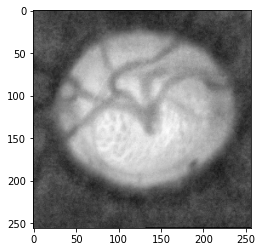

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.dstack((X_test[35],X_test[35],X_test[35] )))

# **Checking Output for Disc Segment**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


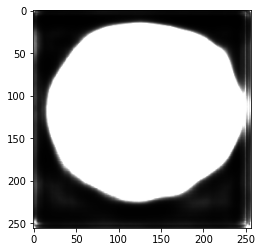

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
test_inp = X_test[35].reshape(1,256,256,1)
test_out = model1.predict(test_inp)
img = test_out[0]*255
plt.imshow(np.dstack((img,img,img)))

# **Checking Output for Cup** **segment**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


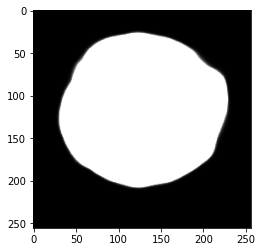

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
test_inp = X_test[35].reshape(1,256,256,1)
test_out = model2.predict(test_inp)
img = test_out[0]*255
plt.imshow(np.dstack((img,img,img)))

In [ ]:
print(np.amax(img))
print(np.amin(img))
print(np.mean(img))

255.0
2.5623153e-13
87.27563


# **CDR Ratios of all** **images**

In [ ]:
for i in range(200):
  test_inp1 = X_test[i].reshape(1,256,256,1)
  org1=Y_test[i].reshape(1,256,256,1)
  org2=Y_test1[i].reshape(1,256,256,1)
  test_out1 = model1.predict(test_inp1)
  img1 = test_out1[0]*255
  test_inp2 = X_test[i].reshape(1,256,256,1)
  test_out2 = model2.predict(test_inp2)
  img2 = test_out2[0]*255
  fi = np.sum(img1 > 0.5)
  si = np.sum(img2 > 0.5)
  o1 = np.sum(org1 == 255)
  o2 = np.sum(org2 == 255)
  ratio=round(si/fi,2)
  ratio1=round(o2/o1,2)
  print('Original : ',ratio1)
  print('Predicted : ',ratio)
  ratio=round(si/fi,2)
  if(round(si/fi,2)>0.6):
    print('Its Glaucoma : ',ratio)
  else:
    print('Safe : ',ratio)
  print("---------------------------------------")

Original :  0.6
Predicted :  0.71
Its Glaucoma :  0.71
---------------------------------------
Original :  0.61
Predicted :  0.58
Safe :  0.58
---------------------------------------
Original :  0.61
Predicted :  0.59
Safe :  0.59
---------------------------------------
Original :  0.61
Predicted :  0.57
Safe :  0.57
---------------------------------------
Original :  0.61
Predicted :  0.55
Safe :  0.55
---------------------------------------
Original :  0.6
Predicted :  0.68
Its Glaucoma :  0.68
---------------------------------------
Original :  0.61
Predicted :  0.55
Safe :  0.55
---------------------------------------
Original :  0.61
Predicted :  0.59
Safe :  0.59
---------------------------------------
Original :  0.61
Predicted :  0.6
Safe :  0.6
---------------------------------------
Original :  0.61
Predicted :  0.58
Safe :  0.58
---------------------------------------
Original :  0.6
Predicted :  0.66
Its Glaucoma :  0.66
---------------------------------------
Original :  0

In [ ]:
test_inp1 = X_test[22].reshape(1,256,256,1)
org1=Y_test[22].reshape(1,256,256,1)
org2=Y_test1[22].reshape(1,256,256,1)
test_out1 = model1.predict(test_inp1)
img1 = test_out1[0]*255
test_inp2 = X_test[22].reshape(1,256,256,1)
test_out2 = model2.predict(test_inp2)
img2 = test_out2[0]*255
fi = np.sum(img1 > 0.5)
si = np.sum(img2 > 0.5)
o1 = np.sum(org1 == 255)
o2 = np.sum(org2 == 255)
ratio=round(si/fi,2)
ratio1=round(o2/o1,2)
print(fi)
print(si)
print('Original : ',ratio1)
print('Predicted : ',ratio)

39832
28379
Original :  0.69
Predicted :  0.71


In [ ]:
print(np.unique(Y_test))


[  0 255]


In [ ]:
print(img)

[[[1.3741628e-02]
  [3.6922909e-04]
  [3.3692828e-05]
  ...
  [1.5320362e-03]
  [6.9770268e-03]
  [1.3854891e-01]]

 [[7.7348860e-04]
  [6.5980814e-05]
  [5.2550535e-05]
  ...
  [3.0138277e-04]
  [3.1400632e-04]
  [7.8526959e-03]]

 [[1.0291837e-04]
  [5.0034589e-05]
  [6.9500333e-05]
  ...
  [8.3905982e-04]
  [6.5542938e-04]
  [2.3084059e-03]]

 ...

 [[1.3313952e-04]
  [7.0871101e-05]
  [7.3699630e-05]
  ...
  [7.8594423e-04]
  [3.7074378e-03]
  [1.7979635e-02]]

 [[1.0043852e-03]
  [4.0110594e-04]
  [2.2777512e-04]
  ...
  [2.4854144e-04]
  [1.6593302e-03]
  [1.7839914e-02]]

 [[6.8178341e-02]
  [9.0397606e-03]
  [1.9079311e-03]
  ...
  [1.8373001e-03]
  [1.8986870e-02]
  [1.2618966e-01]]]


In [ ]:
n_white_pix = np.sum(img > 0.5)
n_black =      np.sum(img < 0.5)
print('Number of white pixels:', n_white_pix)
print('Number of black pixels:', n_black)

Number of white pixels: 24007
Number of black pixels: 41529


In [ ]:
n_white_pix = np.sum(img > 0.5)
n_black =      np.sum(img < 0.5)
print('Number of white pixels:', n_white_pix)
print('Number of black pixels:', n_black)

Number of white pixels: 27855
Number of black pixels: 37681
